In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("fake-news train.csv")

In [3]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [6]:
X = df.drop('label', axis = 1)

In [7]:
X.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [10]:
y = df['label']

In [11]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [13]:
df.shape

(20800, 5)

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [16]:
df = df.dropna()

In [19]:
df.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [20]:
messages = df.copy()

In [21]:
messages.reset_index(inplace = True)

In [23]:
messages.head(10)

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
7,9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
8,10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
9,11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [24]:
messages['title'][3]

'15 Civilians Killed In Single US Airstrike Have Been Identified'

In [31]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re

In [33]:
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)) :
    review = re.sub('[^a-zA-Z]', ' ', messages['title'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if word not in stopwords.words('English')]
    review = ' '.join(review)
    corpus.append(review)

In [34]:
corpus[3]

'civilian kill singl us airstrik identifi'

In [35]:
# tf-idf vectorizer
tfidf = TfidfVectorizer(max_features = 5000, ngram_range = (1, 2))
X = tfidf.fit_transform(corpus).toarray()

In [36]:
X.shape

(18285, 5000)

In [38]:
y = messages['label']

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

In [44]:
tfidf.get_feature_names()[:10]

['abandon',
 'abc',
 'abc news',
 'abduct',
 'abe',
 'abedin',
 'abl',
 'abort',
 'abroad',
 'absolut']

In [45]:
tfidf.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 2),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [46]:
count_df = pd.DataFrame(X_train, columns = tfidf.get_feature_names())

In [47]:
count_df

,abandon,abc,abc news,abduct,abe,abedin,abl,abort,abroad,absolut,...,zealand,zero,zika,zika viru,zionist,zone,zone new,zoo,zu,zuckerberg
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.305244,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12245,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12246,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12247,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12248,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
import matplotlib.pyplot as plt

In [49]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    Seen full source and example from : 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [52]:
# Multinomial algorithm
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()

In [55]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import numpy as np
import itertools

accuracy : 0.878
Confusion matrix, without normalization


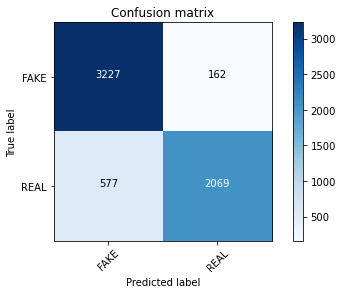

In [58]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = accuracy_score(y_test, pred)
print("accuracy : %0.3f" % score)
cm = confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes = ['FAKE', 'REAL'])

In [59]:
y_train.shape

(12250,)

# Passive Agressive Classifier

In [62]:
from sklearn.linear_model import PassiveAggressiveClassifier
pac = PassiveAggressiveClassifier(max_iter = 50)

Confusion matrix, without normalization


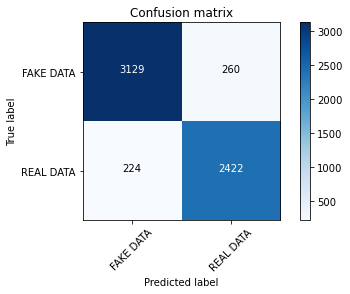

In [64]:
pac.fit(X_train, y_train)
pred = pac.predict(X_test)
score = accuracy_score(y_test, pred)
cm = confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes = ['FAKE DATA', 'REAL DATA'])

# Multinomial classifier with alpha = 0.1

In [65]:
classifier = MultinomialNB(alpha = 0.1)

In [68]:
previous_score = 0
for alpha in np.arange(0, 1, 0.1) :
    sub_classifier = MultinomialNB(alpha = alpha)
    sub_classifier.fit(X_train, y_train)
    y_pred = sub_classifier.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    if score > previous_score :
        classifier = sub_classifier
    print('Alpha : {} Score : {}'.format(alpha, score))
        

C:\Users\zaid\anaconda3\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


Alpha : 0.0 Score : 0.8606462303231152
Alpha : 0.1 Score : 0.8737365368682685
Alpha : 0.2 Score : 0.8752278376139188
Alpha : 0.30000000000000004 Score : 0.8760563380281691
Alpha : 0.4 Score : 0.8762220381110191
Alpha : 0.5 Score : 0.8767191383595692
Alpha : 0.6000000000000001 Score : 0.8772162386081193
Alpha : 0.7000000000000001 Score : 0.8772162386081193
Alpha : 0.8 Score : 0.8773819386909694
Alpha : 0.9 Score : 0.8773819386909694


In [70]:
feature_names = tfidf.get_feature_names()

In [73]:
classifier.coef_[0]

array([-8.79832171, -8.49831518, -8.85793626, ..., -9.90057091,
       -8.39232849, -9.10091564])

In [75]:
# most real
sorted(zip(classifier.coef_[0], feature_names), reverse = True)[:20]

[(-4.9534905624378816, 'hillari'),
 (-4.99076373185156, 'trump'),
 (-5.093337588256095, 'clinton'),
 (-5.4218458104922735, 'elect'),
 (-5.729413961655054, 'video'),
 (-5.7834508137669856, 'comment'),
 (-5.795255403643588, 'war'),
 (-5.8242603096650445, 'us'),
 (-5.870292517291487, 'hillari clinton'),
 (-5.875840177369152, 'fbi'),
 (-5.9324633427438185, 'vote'),
 (-5.951675828473915, 'world'),
 (-6.037070127179886, 'email'),
 (-6.138232661185052, 'obama'),
 (-6.145169809432988, 'america'),
 (-6.169740290462064, 'russia'),
 (-6.229683437706903, 'american'),
 (-6.244300147789644, 'day'),
 (-6.294422576922791, 'donald'),
 (-6.302132967928947, 'break')]

In [76]:
# most fake
sorted(zip(classifier.coef_[0], feature_names))[:5000]

[(-9.90057090561321, 'abe'),
 (-9.90057090561321, 'abroad'),
 (-9.90057090561321, 'abus new'),
 (-9.90057090561321, 'act new'),
 (-9.90057090561321, 'advic'),
 (-9.90057090561321, 'advis new'),
 (-9.90057090561321, 'afford care'),
 (-9.90057090561321, 'age new'),
 (-9.90057090561321, 'agenda breitbart'),
 (-9.90057090561321, 'ail'),
 (-9.90057090561321, 'airbag'),
 (-9.90057090561321, 'aleppo new'),
 (-9.90057090561321, 'ali'),
 (-9.90057090561321, 'america breitbart'),
 (-9.90057090561321, 'american breitbart'),
 (-9.90057090561321, 'american new'),
 (-9.90057090561321, 'ami'),
 (-9.90057090561321, 'ami schumer'),
 (-9.90057090561321, 'amp'),
 (-9.90057090561321, 'ann'),
 (-9.90057090561321, 'ann coulter'),
 (-9.90057090561321, 'announc new'),
 (-9.90057090561321, 'answer new'),
 (-9.90057090561321, 'anti abort'),
 (-9.90057090561321, 'applaud'),
 (-9.90057090561321, 'arson'),
 (-9.90057090561321, 'asian'),
 (-9.90057090561321, 'ask trump'),
 (-9.90057090561321, 'assail'),
 (-9.900570